In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
training_data_genetation=ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

testing_data_generation=ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
)

In [3]:
training_set=training_data_genetation.flow_from_directory(
    r'C:\Users\kushagra joshi\Desktop\dataset\trainig',
    target_size=(64,64),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)

Found 13733 images belonging to 2 classes.


In [4]:
testing_set=training_data_genetation.flow_from_directory(
    r'C:\Users\kushagra joshi\Desktop\dataset\testing',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 2007 images belonging to 1 classes.


In [9]:
cnn=tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01),input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=1024,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=256,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

cnn.add(tf.keras.layers.Dense(units=128,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [10]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\kushagra joshi\Desktop\archive\fire_and_smoke.h5',
                                            monitor='val_loss',mode="min",
                                            save_best_only=True)

callbacks=checkpoint

In [11]:
cnn.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
cnn.fit(
    x=training_set,
    validation_data=testing_set,
    epochs=30,callbacks=callbacks
)

Epoch 1/30
430/430 [==============================] - 399s 926ms/step - loss: 0.1528 - accuracy: 0.9670 - val_loss: 0.2560 - val_accuracy: 0.9880
Epoch 2/30
430/430 [==============================] - 392s 912ms/step - loss: 0.1642 - accuracy: 0.9771 - val_loss: 1.6287 - val_accuracy: 0.0583
Epoch 3/30
430/430 [==============================] - 405s 943ms/step - loss: 0.1276 - accuracy: 0.9827 - val_loss: 0.9884 - val_accuracy: 0.2133
Epoch 4/30
430/430 [==============================] - 393s 914ms/step - loss: 0.1784 - accuracy: 0.9840 - val_loss: 1.5063 - val_accuracy: 0.1614
Epoch 5/30
430/430 [==============================] - 405s 942ms/step - loss: 0.0919 - accuracy: 0.9808 - val_loss: 7.1424 - val_accuracy: 0.0309
Epoch 6/30
430/430 [==============================] - 394s 915ms/step - loss: 0.0702 - accuracy: 0.9845 - val_loss: 5.7889 - val_accuracy: 0.0633
Epoch 7/30
430/430 [==============================] - 388s 903ms/step - loss: 0.0985 - accuracy: 0.9858 - val_loss: 4.3757 -

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data=pd.read_csv(r'C:\Users\kushagra joshi\Desktop\Major1\accuracy_value.csv',delimiter=',')
data

,epoch,relu (Adam),leaky relu (Adam),relu (RMSprop),leaky relu (RMSprop)
0,1,0.9671,0.9731,0.9664,0.9670
1,2,0.9841,0.9750,0.9838,0.9771
2,3,0.9873,0.9837,0.9851,0.9827
3,4,0.9808,0.9861,0.9857,0.9840
4,5,0.9878,0.9897,0.9818,0.9808
5,6,0.9919,0.9905,0.9817,0.9845
6,7,0.9910,0.9918,0.9854,0.9858
7,8,0.9924,0.9916,0.9843,0.9866
8,9,0.9937,0.9943,0.9872,0.9852
9,10,0.9916,0.9926,0.9857,0.9840


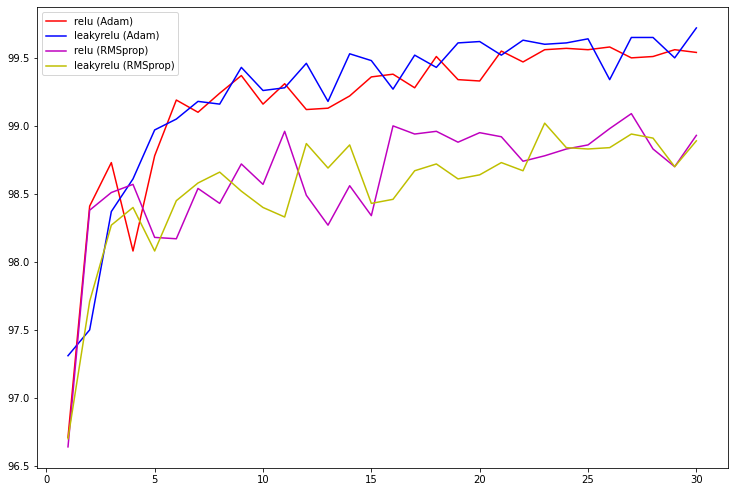

In [19]:
epoch=data['epoch']
relu_adam=100*data['relu (Adam)']
leaky_relu_adam=100*data['leaky relu (Adam)']
relu_RMSprop=100*data['relu (RMSprop)']
leaky_relu_RMSprop=100*data['leaky relu (RMSprop)']
fig=plt.figure()
myaxis=fig.add_axes([0.1,0.1,1.6,1.6])
myaxis.plot(epoch,relu_adam,'r',label='relu (Adam)')
myaxis.plot(epoch,leaky_relu_adam,'b',label='leakyrelu (Adam)')
myaxis.plot(epoch,relu_RMSprop,'m',label='relu (RMSprop)')
myaxis.plot(epoch,leaky_relu_RMSprop,'y',label='leakyrelu (RMSprop)')
myaxis.legend()

In [16]:
from tensorflow.keras.models import load_model
cnn=load_model(r'C:\Users\kushagra joshi\Desktop\archive\fire_and_smoke.h5')

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 256)        0

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import PIL
import numpy as np
from tensorflow.keras.models import load_model

In [12]:
test_image=r'C:\Users\kushagra joshi\Desktop\dataset\trainig\smoke\000012.jpg'

1/1 [==============================] - 0s 107ms/step


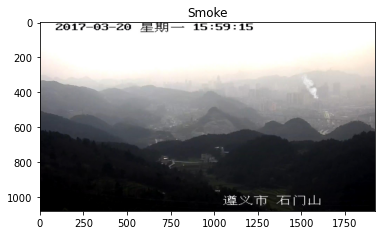

In [13]:
testing=image.load_img(test_image,target_size=(64,64))
testing=image.img_to_array(testing)
testing=testing/255
testing=np.expand_dims(testing,axis=0)
result=cnn.predict(testing)

Categories=['Fire','Smoke']

image_show=PIL.Image.open(test_image)
plt.imshow(image_show)

plt.title(Categories[int(result[0][0])])
plt.show()

In [14]:
test_image=r'C:\Users\kushagra joshi\Desktop\dataset\trainig\fire\a.jpg'

1/1 [==============================] - 0s 23ms/step


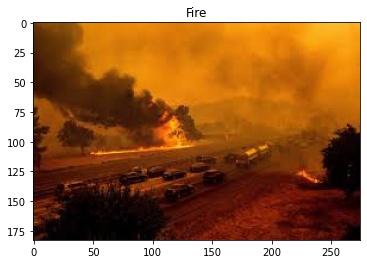

In [15]:
testing=image.load_img(test_image,target_size=(64,64))
testing=image.img_to_array(testing)
testing=testing/255
testing=np.expand_dims(testing,axis=0)
result=cnn.predict(testing)

Categories=['Fire','Smoke']

image_show=PIL.Image.open(test_image)
plt.imshow(image_show)

plt.title(Categories[int(result[0][0])])
plt.show()